# Prova 1 - Física Computacional
_Tiago Daniel Rodrigues da Silva_

## Problema 1
---
A sonda Mars Express foi lançada da Terra em junho de 2003 e chegou em Marte em Dezembro de 2003. Os valores da posição (x,y) da sonda em função do tempo estão no arquivo marsexpress.dat, com o tempo, dado em dias, na primeira coluna, e as posições x e y em quilômetros, na segunda e terceira colunas respectivamente.

**a) Transforme a unidade das posições de km para unidades astronômicas (AU), sabendo que 1 AU = 149 598 000 km**

Carregando e visualizando o dataset:

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./marsexpress.dat', sep='  ', names=['tempo', 'x_km', 'y_km'], on_bad_lines='skip')

print(data)


           tempo         x_km         y_km
0       0.000000  -28169824.0 -149195880.0
1       0.049532  -28034186.0 -149223740.0
2       0.099065  -27898530.0 -149251490.0
3       0.148597  -27762857.0 -149279140.0
4       0.198129  -27627166.0 -149306690.0
...          ...          ...          ...
3995  197.881510  149753590.0  160061090.0
3996  197.931040  149691010.0  160133430.0
3997  197.980570  149628460.0  160205670.0
3998  198.030100  149565980.0  160277820.0
3999  198.079630  149503610.0  160349830.0

[4000 rows x 3 columns]


C:\Users\tiago\AppData\Local\Temp\ipykernel_2512\2867630028.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('./marsexpress.dat', sep='  ', names=['tempo', 'x_km', 'y_km'], on_bad_lines='skip')


Agora, aplicando a conversão para unidades astronômicas em uma nova conluna

In [230]:
au_km = 149598000

data['x_au'] = data['x_km'] / au_km
data['y_au'] = data['y_km'] / au_km

print(data)

           tempo         x_km         y_km      x_au      y_au
0       0.000000  -28169824.0 -149195880.0 -0.188303 -0.997312
1       0.049532  -28034186.0 -149223740.0 -0.187397 -0.997498
2       0.099065  -27898530.0 -149251490.0 -0.186490 -0.997684
3       0.148597  -27762857.0 -149279140.0 -0.185583 -0.997869
4       0.198129  -27627166.0 -149306690.0 -0.184676 -0.998053
...          ...          ...          ...       ...       ...
3995  197.881510  149753590.0  160061090.0  1.001040  1.069941
3996  197.931040  149691010.0  160133430.0  1.000622  1.070425
3997  197.980570  149628460.0  160205670.0  1.000204  1.070908
3998  198.030100  149565980.0  160277820.0  0.999786  1.071390
3999  198.079630  149503610.0  160349830.0  0.999369  1.071871

[4000 rows x 5 columns]


**b) A partir dos dados, faça um gráfico da trajetória da sonda, ou seja, faça um gráfico da posição y versus a posição x. Não esqueça de incluir a descrição (labels) dos eixos e unidades**
<br><br>
Utilizando `pyplot` do `matplotlib`, podemos criar o seguinte gráfico:

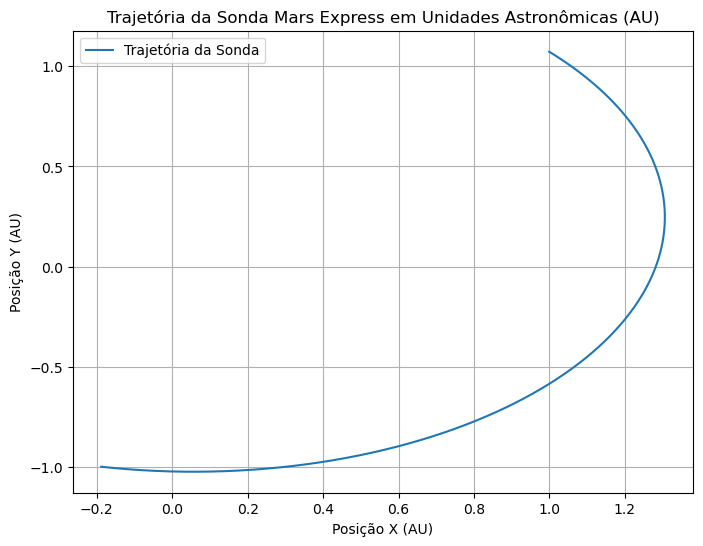

In [231]:
plt.figure(figsize=(8, 6))
plt.plot(data['x_au'], data['y_au'], label='Trajetória da Sonda')
plt.xlabel('Posição X (AU)')
plt.ylabel('Posição Y (AU)')
plt.title('Trajetória da Sonda Mars Express em Unidades Astronômicas (AU)')
plt.legend()
plt.grid(True)

**c) Calcule e faça o gráfico da velocidade da sonda em função do tempo. Lembre-se que  $v = \sqrt{v²_x + v²_y}$. Novamente, não esqueça de incluir a descrição dos eixos do gráfico.**
<br><br>
Primeiramente, vamos calcular a velocidade em x e y através da derivada direcional e armazenar em novas colunas `vx` e  `vy`

In [232]:
data['vx'] = np.gradient(data['x_au'], data['tempo'])
data['vy'] = np.gradient(data['y_au'], data['tempo'])


Agora, plotando o gráfico da velocidade pelo tempo:

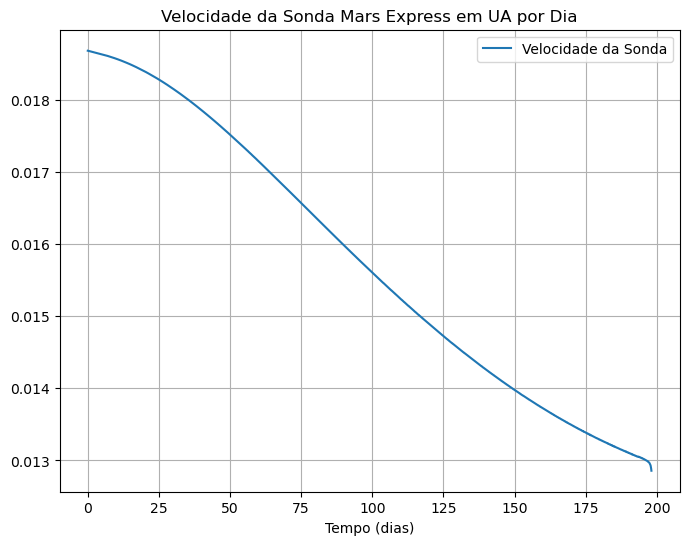

In [233]:
data['v'] = np.sqrt(data['vx']**2 + data['vy']**2)

plt.figure(figsize=(8,6))
plt.plot(data['tempo'], data['v'], label = 'Velocidade da Sonda')
plt.xlabel('Tempo (dias)')
plt.title('Velocidade da Sonda Mars Express em UA por Dia')
plt.legend()
plt.grid(True)

plt.show()


In [234]:
vxFinal = data.tail(1)['vx']
vyFinal = data.tail(1)['vy']

vFinalAuDay = np.sqrt(vxFinal**2 + vyFinal**2)
vFinalKmH = vFinalAuDay * 149598000/24

print(f"Velocidade final em Marte: {vFinalKmH} km/h")


Velocidade final em Marte: 3999    80140.986114
dtype: float64 km/h


# Problema 2
---
O período de um pêndulo simples, onde vale a aproximação de pequenas oscilações, é dado por $T = 2\pi\sqrt{\frac{L}{g}}$, onde $L$ é o comprimento do pêngulo e $g$ é a aceleração da gravidade. Para o caso de grandes amplitudes, onde não vale a aproximação harmônica, o período é dado pela integral

$$\tau = 2\sqrt\frac{L}{g}\int_{0}^{\theta_0}{[sen^2({\theta_0}/{2})-sen^2({\theta}/{2})]^{-1/2}}d\theta$$

onde $\theta_0$ é a amplitude de oscilação (deslocamento inicial).

**a) Escreva uma função em Python para resolver a integral acima pelo método de Simpson, com $\theta_0$ sendo o parâmetro da função**

Definindo o método de integração:

In [235]:
def simpson_integral(f, a, b, n):
    h = (b-a)/n
    k = np.arange(1,(n/2)+1)
    return (1/3)*h*( f(a) + f(b) + 4*np.sum(f(a+(2*k-1)*h)) + 2*np.sum(f(a+2*(k[:-1])*h)) )


Agora, definiremos os parâmetros para o caso específico ($f(x)$ , $\theta_0$ , $n$)

In [236]:
def integralTau(theta0):

    def f(theta): # define a função que vamos integrar
        return np.where(theta == theta0, 0, 1 / np.sqrt(np.sin(theta0 / 2)**2 - np.sin(theta / 2)**2))

    n = 1000

    return simpson_integral(f, 0, theta0, n) # Parametros para simpson: f aplicada de 0 ate theta_0, com n partições

In [237]:
print(f"O período para theta_0 = {1} é {integralTau(1)} segundos")

O período para theta_0 = 1 é 3.2886215779011376 segundos


C:\Users\tiago\AppData\Local\Temp\ipykernel_2512\647623140.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta == theta0, 0, 1 / np.sqrt(np.sin(theta0 / 2)**2 - np.sin(theta / 2)**2))


**b) Considerando $\sqrt{\frac{L}{g}} = 1$, utilize sua função para calcular o valor de $\tau$ para valores de $\theta_0$ entre $0°$ $80°$ (não esqueça de transformar os ângulos para radianos!). Faça então o gráfico de $\tau$ em função de $\theta_0$. Na mesma figura, faça também o gráfico de T (Equação 1) em função de $\theta_0$ (utilize linha pontilhada).**

Para $\sqrt{\frac{L}{g}} = 1$, podemos definir a equação do período como:

In [238]:
def tau(theta0):
  return 2 * integralTau(theta0) # Calcula tau

Plotando o gráfico:

In [239]:
thetas0Degree = np.linspace(0.001, 80, 1000)
thetas0Rad = np.deg2rad(thetas0Degree)

Ts = np.copy(thetas0Rad)
Ts[:] = 2 * np.pi

taus = [tau(angle) for angle in thetas0Rad]


C:\Users\tiago\AppData\Local\Temp\ipykernel_2512\647623140.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta == theta0, 0, 1 / np.sqrt(np.sin(theta0 / 2)**2 - np.sin(theta / 2)**2))


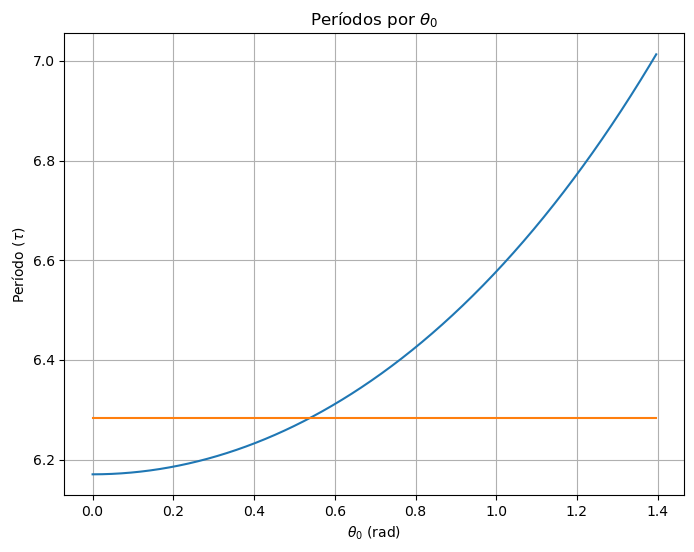

In [240]:
plt.figure(figsize=(8,6))
plt.plot(thetas0Rad, taus)

plt.plot(thetas0Rad, Ts)
plt.grid()

plt.title(r'Períodos por $\theta_0$')
plt.xlabel(r'$\theta_0$ (rad)')
plt.ylabel(r'Período ($\tau$)')

plt.show()


**c) Com base no gráfico responda: para qual valor máximo de $\theta_0$, podemos considerar a aproximação harmônica válida?**

Pela análise do gráfico, valores até $\theta_0 = 0.8$ parecem aproximações válidas. Entretanto, para valores maiores, a diferença é mais evidente.

In [241]:
print("Período             2*pi               Erro")
print("-------------------------------------------")
print(f"{tau(0.6)} - {2*np.pi} = {tau(0.6) - 2*np.pi}")
print(f"{tau(0.8)} - {2*np.pi} = {tau(0.8) - 2*np.pi}")
print(f"{tau(1)} - {2*np.pi} = {tau(1) - 2*np.pi}")


Período             2*pi               Erro
-------------------------------------------
6.311486882404697 - 6.283185307179586 = 0.02830157522511101
6.425240433673766 - 6.283185307179586 = 0.14205512649417962
6.577243155802275 - 6.283185307179586 = 0.294057848622689


C:\Users\tiago\AppData\Local\Temp\ipykernel_2512\647623140.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta == theta0, 0, 1 / np.sqrt(np.sin(theta0 / 2)**2 - np.sin(theta / 2)**2))


# Problema 3
---
O movimento de um pêndulo simples é descrito pela EDO:
<br><br>
$$\frac{d²\theta}{dt²} + w²sen\theta = 0$$

**a) Resolva numericamente essa EDO pelo método RK4, entre $t = 0$ e $t = 20$, e para duas condições iniciais $\theta = 10°$ e $\theta = 60°$, ambos com velocidades iniciais iguais a zero (não esqueça de transformar graus para radianos!). Numa mesma figura, faça o gráfico da solução $\theta(t)$ em função do tempo para os dois casos. Considere $w = 0.7s^{-1}$**

Primeiro, vamos definir as constantes que vamos utilizar

In [242]:
w = 0.7  
ti = 0  
tf = 20  
n = 1000

theta_1_deg = 10  
theta_2_deg = 60  
theta_1_rad = np.deg2rad(theta_1_deg)  
theta_2_rad = np.deg2rad(theta_2_deg)  

Definindo o método Runge-Kutta para 4° ordem:

In [243]:
def metRK4(f, x0, ti, tf, n):
    x = x0
    h = (tf - ti) / n
    xpoints = []
    tpoints = np.arange(ti, tf + h, h)

    for t in tpoints:
        k1 = h * f(x, t)
        k2 = h * f(x + k1 / 2, t + h / 2)
        k3 = h * f(x + k2 / 2, t + h / 2)
        k4 = h * f(x + k3, t + h)
        
        xpoints.append(x[0])  
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return tpoints, xpoints

Como a EDO é de segunda ordem, vamos reduzi-la a um conjunto de EDOs de primeira ordem. Neste caso, podemos escrever $\frac{d²\theta}{dt²} + w²sen\theta = 0$ como:

$$\frac{d\theta}{dt} = \omega$$

$$\frac{d\omega}{dt} = -w²sen(\theta) = f(\theta, \omega, t)$$

Assim, temos a função `pendulo`, que calcula as derivadas primeira e segunda de $\theta$ em relação a $t$. Esta função será chamada no método `RK4`.

In [244]:

def pendulo(theta_dtheta, t):
    dnTheta_dt = np.zeros(2)
    dnTheta_dt[0] = theta_dtheta[1]     # Derivada primeira
    dnTheta_dt[1] = -w**2 * np.sin(theta_dtheta[0])     # Derivada segunda
    return dnTheta_dt

tpoints, theta1_points = metRK4(pendulo, [theta_1_rad, 0], ti, tf, n)
tpoints, theta2_points = metRK4(pendulo, [theta_2_rad, 0], ti, tf, n)


Plotando o gráfico:

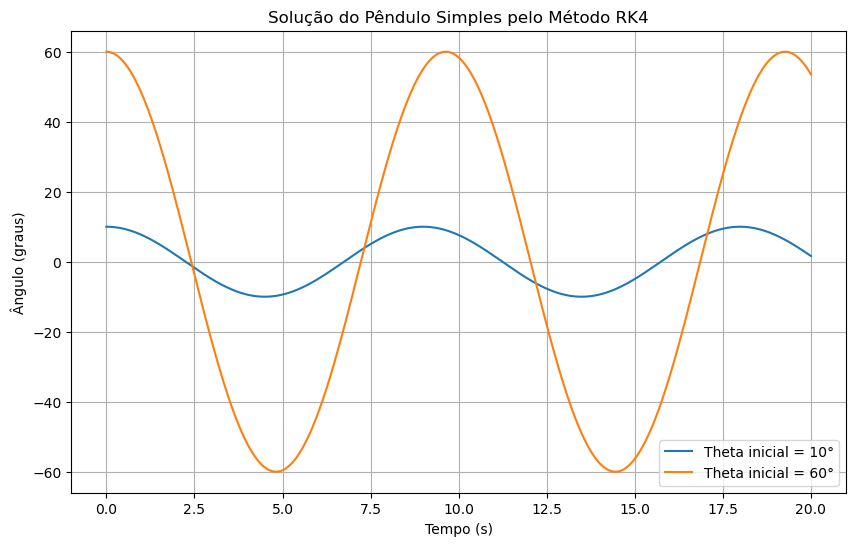

In [245]:
theta1_deg = np.rad2deg(theta1_points)
theta2_deg = np.rad2deg(theta2_points)

# Plote os resultados
plt.figure(figsize=(10, 6))
plt.plot(tpoints, theta1_deg, label=f'Theta inicial = {theta_1_deg}°')
plt.plot(tpoints, theta2_deg, label=f'Theta inicial = {theta_2_deg}°')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (graus)')
plt.legend()
plt.title('Solução do Pêndulo Simples pelo Método RK4')
plt.grid(True)
plt.show()

**b) A energia total do pêndulo, que é conservada nesse sistema, pode ser escrita como:**
$$E = \frac{1}{2}mL^2\left({\frac{d\theta}{dt}}\right)^2+mgL(1-cos\theta)$$
**onde $L = g/\omega^2$, $g$ é a aceleração da gravidade e $m = 1 kg$. Para o caso $\theta_0 = 60°$, faça o gráfico de E em função do tempo. O que se pode concluir o resultado?**